# Mean Shift 군집화
---
- Mean Shift는 KDE(Kernel Density Esitimation)를 이용하여 데이터 포인트들이 데이터 분포가 높은 곳으로 이동하면서 군집화를 수행
- 별도의 군집화 개수를 지정하지 않으며 Mean Shift는 데이터 분포도에 기반하여 자동으로 군집화 개수를 정함.

## Mean SHift 수행절차
---
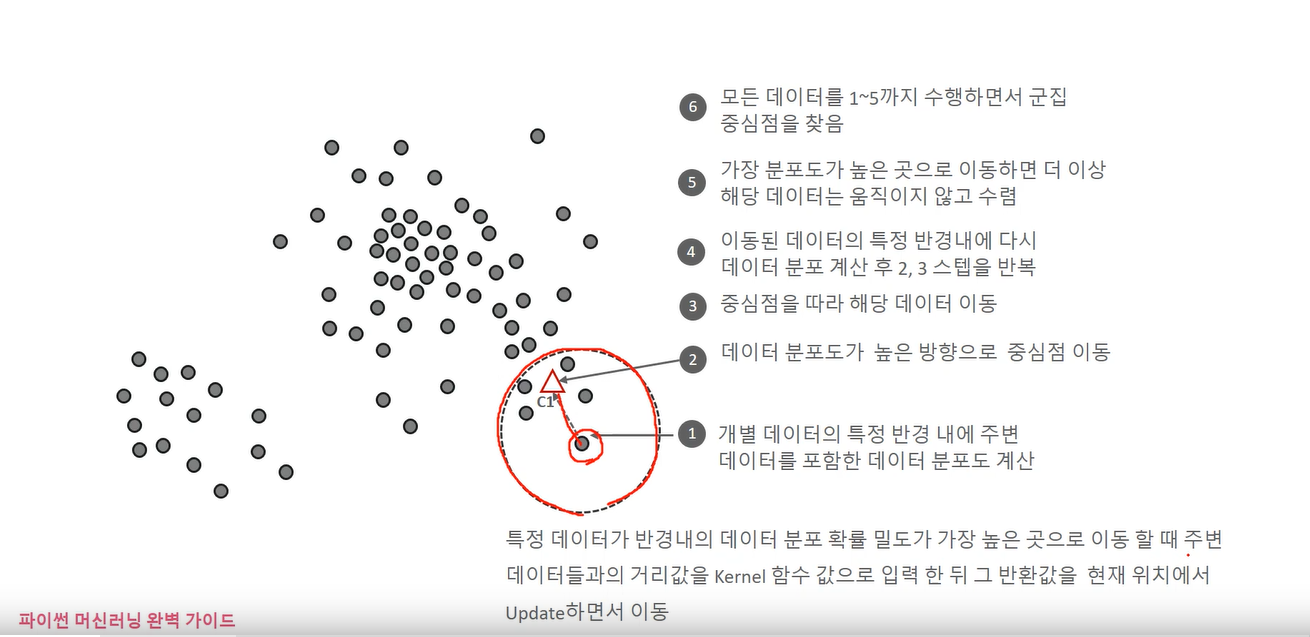

## KDE(Kernel Density Estimation)
---
KDE는 커널함수를 통해 어떤 변수의 확률밀도 함수를 추정하는 방식. 관측된 데이터 각각에 커널 함수를 적용한 값을 모두 더한 뒤 데이터 건수로 나누어서 확률 밀도 함수를 추정

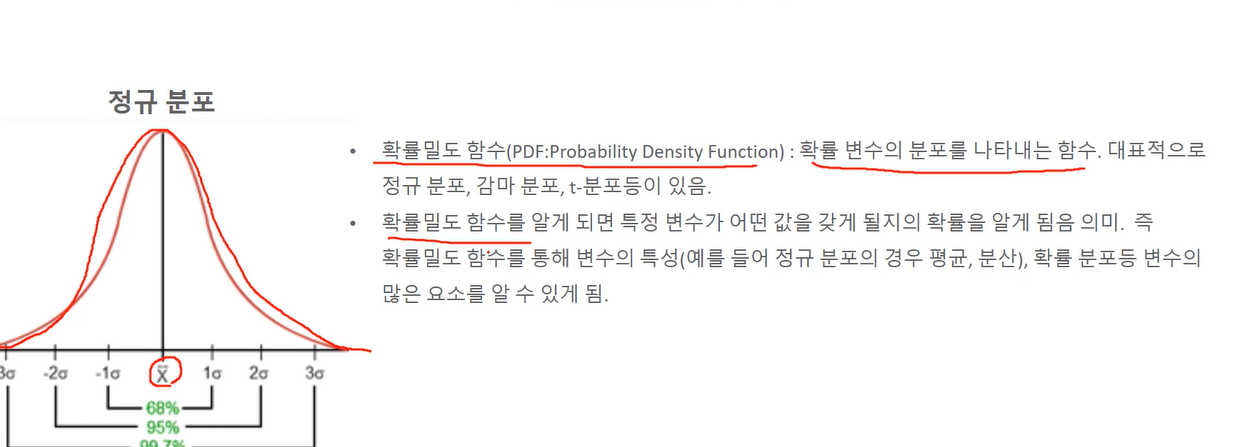


## 확률 밀도 추정 방법
---
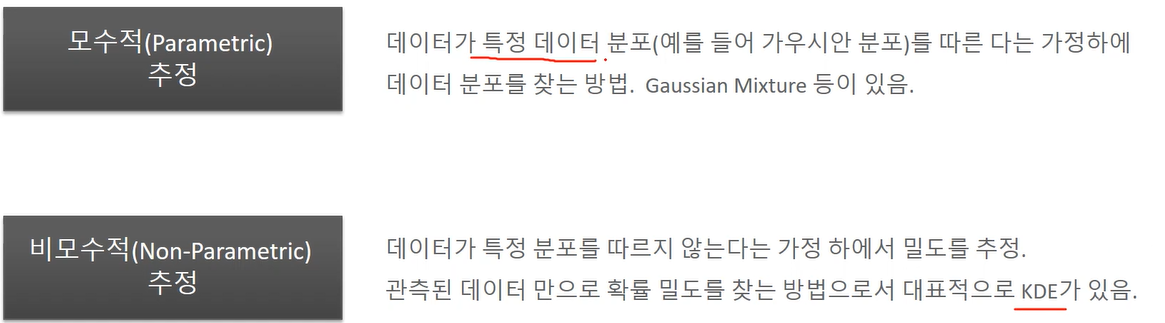

## 비모수적 밀도 추정 - 히스토그램(Histogram)
---
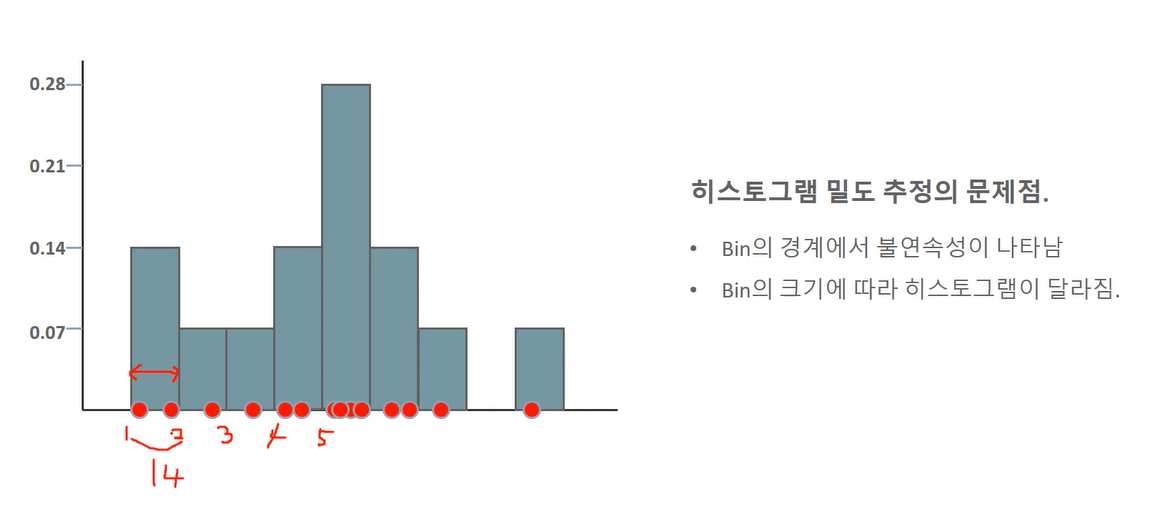

비모수적 밀도 추정 - KDE
---
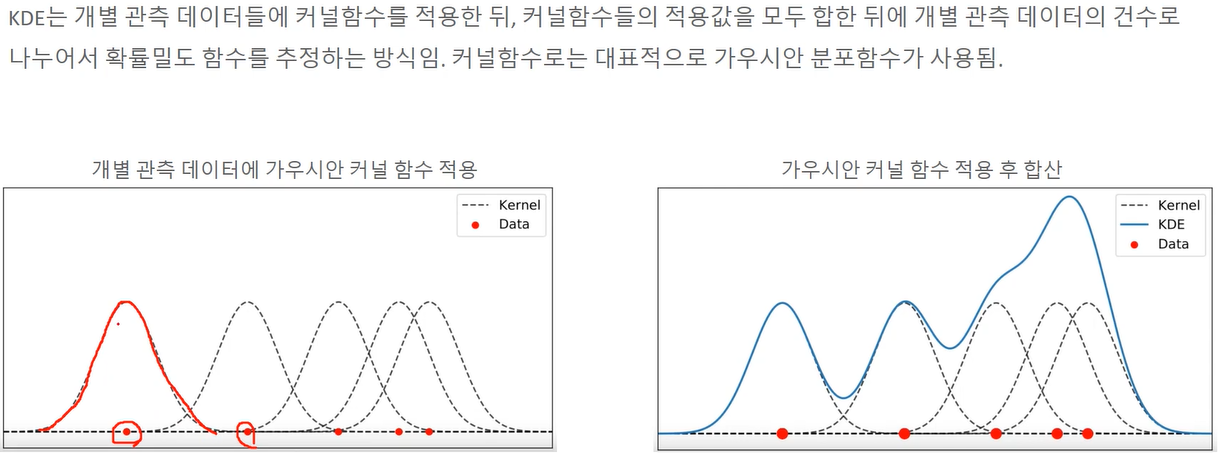

## KDE와 가우시안 커널 함수
---
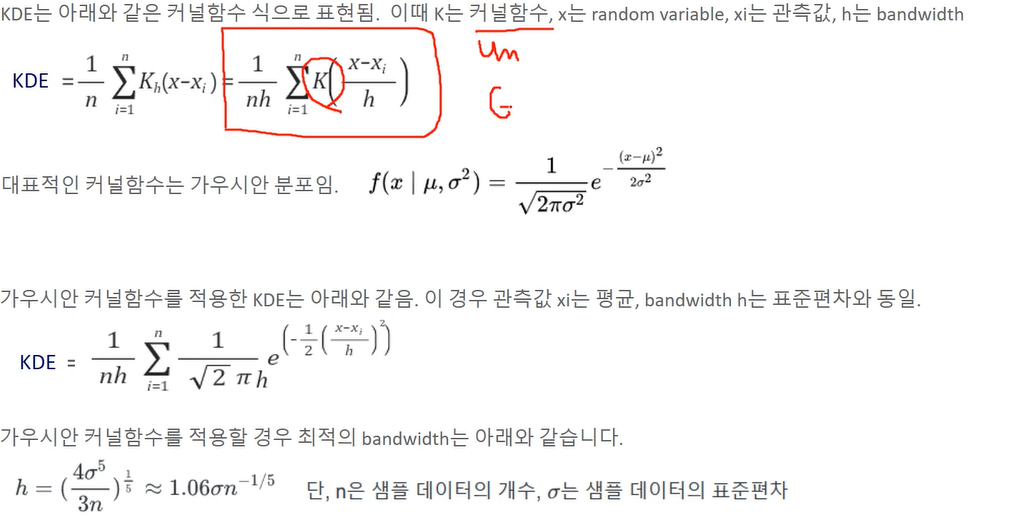

## Bandwidth에 따른 KDE의 변화
---
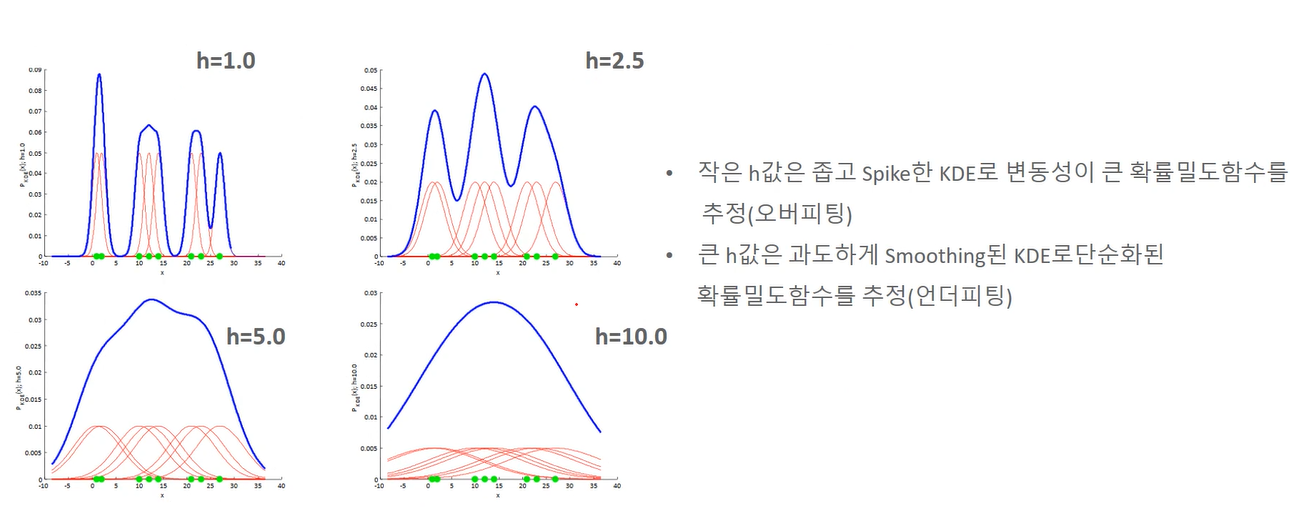

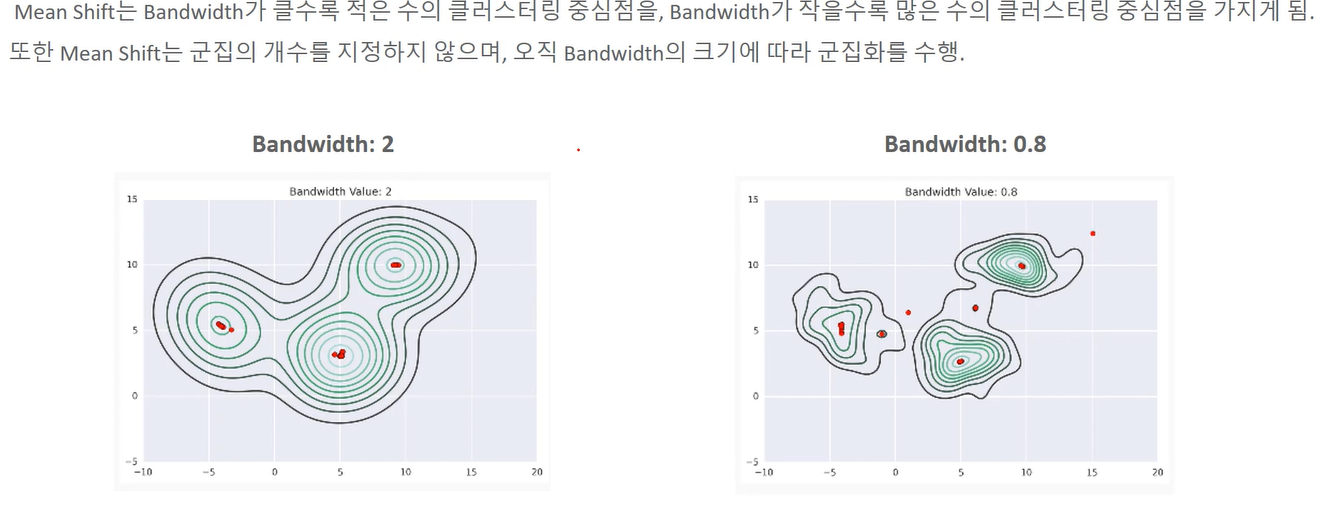

## 사이킷런 Means SHift
---
- 사이킷런은 Means Shift 군집화를 위해 MeansShift 클래스를제공
- MeanShift 클래스의 가장 중요한 초기화 파라미터는 Bandwidth 이며 해당 파라미터는 밀도 중심으로 이동 할때 사용되는 커널 함수의 bandwith임.
이 bandwidth를 어떻게 설정하느냐에 따라 군집화의 성능이 달라짐
- 최적의 bandwith 계산을 위해 사이킷런은 estimate_bandwith()함수를 제공.

## KDE(Kernel Density Estimation)의 이해
---
**seaborn의 distplot()를 이용하여 KDE 시각화**

[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985   0.14404357  1.45427351
  0.76103773  0.12167502  0.44386323  0.33367433  1.49407907 -0.20515826
  0.3130677  -0.85409574 -2.55298982  0.6536186   0.8644362  -0.74216502
  2.26975462 -1.45436567  0.04575852 -0.18718385  1.53277921  1.46935877]


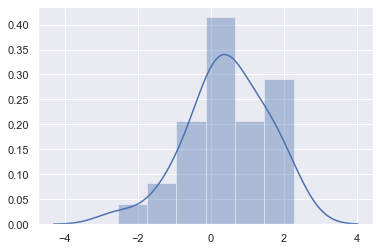

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)

np.random.seed(0)
x = np.random.normal(0,1,size = 30)
print(x)
sns.distplot(x);

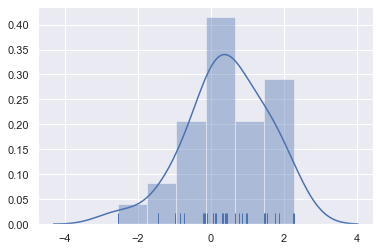

In [4]:
sns.distplot(x,rug =True)

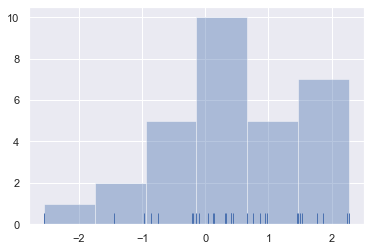

In [5]:
sns.distplot(x,kde=False,rug =True)

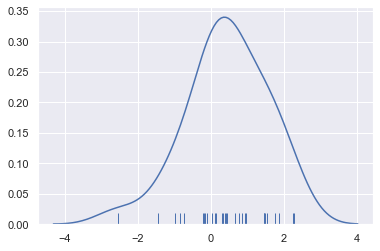

In [6]:
sns.distplot(x,hist=False,rug =True)

**개별 관측데이터에 대해 가우시안 커널 함수를 적용**

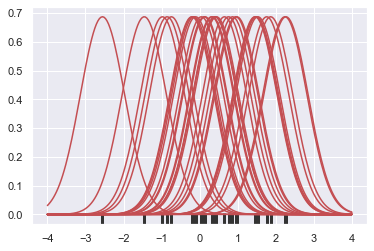

In [11]:
from scipy import stats 

bandwidth = 1.06 *x.std() *x.size**(-1/5.)
support = np.linspace(-4,4,200)

kernels = []

for x_i in x:
    kernel = stats .norm(x_i,bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support,kernel,color='r')
    
sns.rugplot(x,color='.2',linewidth = 3);

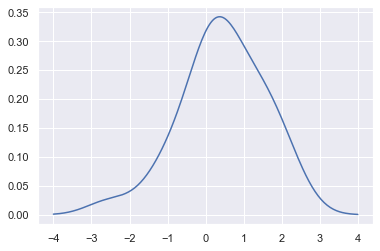

In [13]:
from scipy.integrate import trapz
density = np.sum(kernels,axis = 0)
density /= trapz (density,support)
plt.plot(support,density);

**seabron은 kdeplot()으로 kde 곡선을 바로 구할 수 있음**

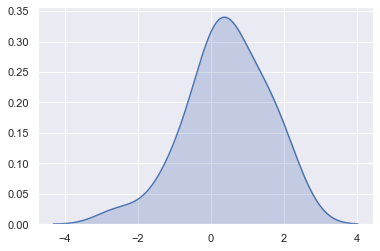

In [14]:
sns.kdeplot(x,shade= True)

**bandwidth에 따른 KDE 변화**

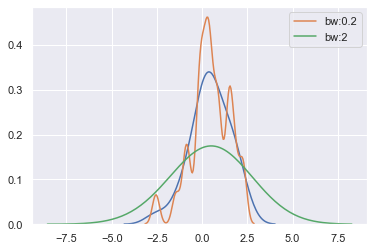

In [15]:
sns.kdeplot(x)
sns.kdeplot(x, bw= .2 , label = 'bw:0.2')
sns.kdeplot(x, bw= 2 , label = 'bw:2')
plt.legend()

## 사이킷런을 이용한 Means Shift
---
make_blobs()를 이용하여 2개의 feature와 3개의 군집 중심점을 가지는 임의의 데이터 200개를 생성하고 MeansShift를 이용하여 군집화 수행

In [16]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples=200, n_features=2, centers=3, 
                  cluster_std=0.7, random_state=0)

meanshift= MeanShift(bandwidth=0.8)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5]


**커널함수의 bandwidth크기를 1로 약간 증가 후에 Mean Shift 군집화 재 수행**

In [17]:
meanshift= MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


**최적의 bandwidth 값을 estimate_bandwidth()로 계산 한 뒤에 다시 군집화 수행**

In [19]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X,quantile = 0.25)
print('bandwidth 값:', round(bandwidth,3))

bandwidth 값: 1.518


In [20]:
import pandas as pd


clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

# estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(X)

meanshift= MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels))    

cluster labels 유형: [0 1 2]


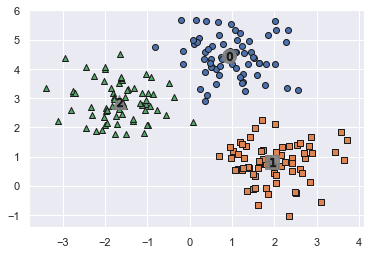

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label']  = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'x', '*']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label']==label]
    center_x_y = centers[label]
    # 군집별로 다른 마커로 산점도 적용
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label] )
    
    # 군집별 중심 표현
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray', alpha=0.9, marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)
    
plt.show()


In [24]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: meanshift_label, dtype: int64
